Test Score: 0.8888888888888888
Train Score: 0.9120603015075377


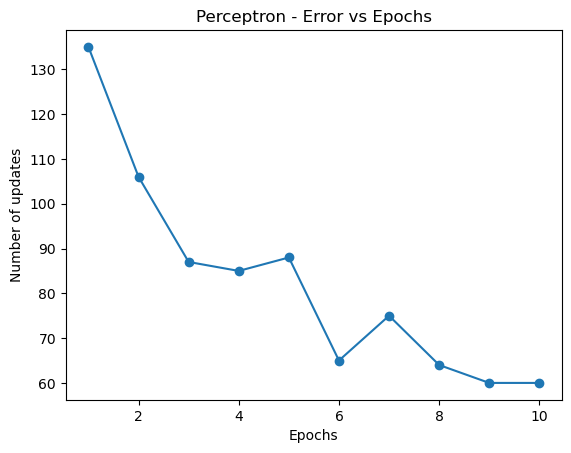

In [1]:
# Using perceptron on breast cancer data

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the data set
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

class CustomPerceptron:
    def __init__(self, eta=0.01, n_iterations=10):
        self.eta = eta
        self.n_iterations = n_iterations

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iterations):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

# Instantiate CustomPerceptron
prcptrn = CustomPerceptron(n_iterations=10)

# Fit the model
prcptrn.fit(X_train, y_train)

# Score the model
test_score = prcptrn.score(X_test, y_test)
train_score = prcptrn.score(X_train, y_train)

print(f"Test Score: {test_score}")
print(f"Train Score: {train_score}")

# Plot the error vs Epochs
plt.plot(range(1, len(prcptrn.errors_) + 1), prcptrn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron - Error vs Epochs')
plt.show()